In [16]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
X,y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), random_state=42)

In [18]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [19]:
print(df)

           x         y  label
0  -7.726421 -8.394957      2
1   5.453396  0.742305      1
2  -2.978672  9.556846      0
3   6.042673  0.571319      1
4  -6.521840 -6.319325      2
..       ...       ...    ...
95 -3.186120  9.625962      0
96 -1.478198  9.945566      0
97  4.478593  2.377221      1
98 -5.796576 -5.826308      2
99 -3.348415  8.705074      0

[100 rows x 3 columns]


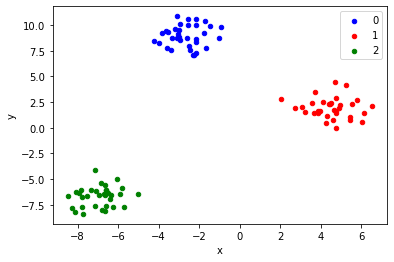

In [86]:
colors = {0:'blue', 1:'red', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.legend()
plt.show()

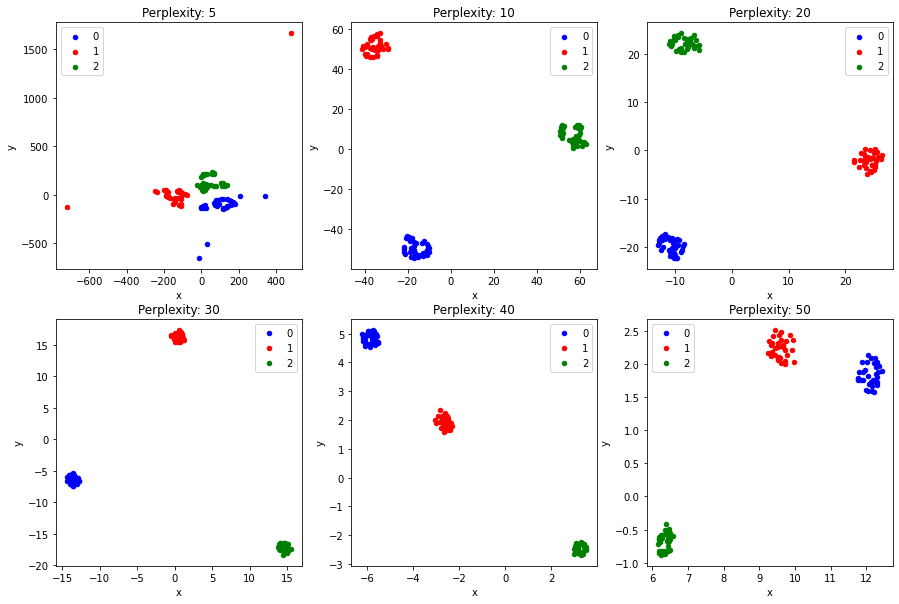

In [87]:
fig, axs = plt.subplots(2 , 3 , figsize=(15, 10))
axs = axs.ravel()
perlexity_list = [5 , 10 , 20 , 30 , 40 , 50]
for i in range(len(perlexity_list)):
    tsne_results =TSNE(n_components=2, 
                   perplexity=perlexity_list[i], 
                   early_exaggeration=12.0, 
                   n_iter=1000,  
                   metric='euclidean', 
                   verbose=0,random_state=20,  
                   n_jobs=None).fit_transform(df[['x' , 'y']])
    tsne_results_df = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1]))
    tsne_results_df = pd.concat([tsne_results_df , df[['label']]] , axis = 1)
    grouped = tsne_results_df.groupby('label')
    for key, group in grouped:
        graph = group.plot(ax=axs[i], kind='scatter', x='x', y='y', label=key, color=colors[key])
    axs[i].title.set_text(f'Perplexity: { perlexity_list[i]}')
plt.show()

In [88]:
### relationship between perplexity and number of samples
### relationship between perplexity and randomness